# Creative approaches to problem solving[$^1$](https://qz.com/192071/how-one-college-went-from-10-female-computer-science-majors-to-40/) in neuroscience using Python
## Introduction to (Scientific) Progamming
### featuring Neurons and Maths

by [Christopher Brian Currin](https://chriscurrin.com)

A *functional approach* to learning code. *Why-based* in contrast to *fact-based*.

![Cape Town](https://images.unsplash.com/photo-1563656157432-67560011e209?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=900&h=300&q=80)


---

**Imbizo 2023** - version 2.5

**Imbizo 2022** - version 2.0

**Imbizo 2020** - version 1.0

---

**what's in a name**

> Python is named after the creator's favourite TV show at the time...
\
![what's in a name - monty python](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fm.media-amazon.com%2Fimages%2FM%2FMV5BOTFmYTc3ZWEtNTYxNi00OTA4LTk2NjEtNTI2MTJlNzkyMDdlXkEyXkFqcGdeQWpybA%40%40._V1_UX477_CR0%2C0%2C477%2C268_AL_.jpg&f=1&nofb=1)

**first principles**

> we will be implementing a simulator from scratch instead of using a library like [NEURON](https://neuron.yale.edu/neuron/), [Brian2](https://brian2.readthedocs.io/en/stable/), or the many other available.
\
> This will help teach us some of the **fundamentals of programming**. Plus we get to appeciate some of the math (*yes I know, scary right!*🙀) and its implementation.




# The Neuron
![neuron](https://images.unsplash.com/photo-1564325724739-bae0bd08762c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1366&&h=500&q=80)

## Neurons are electrical ⚡ 

**Membranes are capacitors.**

> Q: What is the equation for a capacitor?

![capacitance](https://upload.wikimedia.org/wikipedia/commons/0/0c/Cable_theory_Neuron_RC_circuit_v3.svg)

The membrane potential ($V$ or $V_m$ or even sometimes $u$) of a neuron **changes** in time according to all the electrical input it receives (in the form of currents, $I$) and its *membrane capacitance* $C_m$.

In the absence of any input, the potential is at its resting value $V_{rest} = -65 mV$. What is this set by?

If the neuron receives synaptic input from other neurons, the *time-dependent*, $t$, potential $V(t)$ will be deflected from its resting value.

$$
C_m \frac{dV}{dt} = \sum_{k}{I_k(t)} \tag{1}
$$

where $k$ are the sources of current, such as synaptic input.

### Neurons are lazy 💤


However, the neuron will want to return to it's resting membrane potential. Because everyone likes to rest.

$$
C_m \frac{dV}{dt} = -\frac{(V(t) - V_{rest})}{R_m} - \sum_{k}{I_k(t)} \tag{2}
$$

where $R_m$ is the *membrane resistance*. This new term $-\frac{(V(t) - V_{rest})}{R_m}$ represents the **leak current** and is often formulated as 

$$
I_{leak}(t) = \frac{(V(t) - V_{rest})}{R_m} = \bar g_{leak}(V(t) - \bar E_{leak}) \tag{3}
$$

Where $g$ is the **conductance** and $E$ is the **reversal potential**. The bar symbol $\bar g$ mean it is a constant. 

> Much of the complexity and richness of neuronal dynamics arises because membrane conductances change over time. However, some of the factors that contribute to the total membrane current can be treated as relatively constant (i.e. $\bar g$ instead of $g(t)$), and these are typically grouped together into a single term called the **leakage current**. The currents carried by ion pumps that maintain the concentration gradients that make equilibrium potentials nonzero typically fall into this category.

Together, $C_m$ and $R_m$ therefore set the time it takes for input current to shift the voltage away from rest (aka the rise time as the capacitor charges) and the time it takes to return to rest (aka the decay time as the capacitance dessipates through the leak). This is known as the **membrane time constant** $\tau_m = C_m \cdot R_m$. 

### Experimentalists suck 🪡


Of course, experimentalists love poking neurons with electrodes, so we also need to consider externally injected current $I_e$. 

$$
C_m \frac{dV}{dt} = -I_{leak}(t) - \sum_{k}{I_k(t)} + \frac{I_e(t)}{A} \tag{4}
$$

where $A$ is the surface area of the injected current (sometimes $A$ is ignored when dealing with neurons with no size - $\rm{point}$ $\rm{neurons}$)


**How do we even go about putting this into a computer!?**

What do we **need to know** in order to figure out **what we don't**?

In [ ]:
# Parameters for neuronal voltage
V_rest = -65  # resting membrane potential (mV)
C_m = 1       # membrane capacitance (nF)
R_m = 100     # membrane resistance (MOhm)
I_e = 0       # external current (nA)
A = 10        # surface area of electrode (um^2)

Our first (real, useful) block of code!

Did you run the cell?

what does it do?



## Assignment `=`

In general terms, these are examples of **variable assignment** - assigning a value to a name (because we can change the value later)

As in many programming languages, a Python assignment statement associates a symbolic *name* on the left-hand side with a *value *on the right-hand side. In Python, we say that names refer to values, or a name is a reference to a value. This is done using the equals '`=`' operator. (In R this can be '`<-`' and in Go this can be '`:=`').

> *if you're very confuzzled by variables and assigning values to names, check out this [post](https://nedbatchelder.com/text/names.html)*

## Comments `#`


**Comments** in Python are preceded by a '`#`' and indicate extra information *that is magically ignored when you run the cell*. Comments *in other languages* can be '`// single line comment`' or '
```
/* multi
line
comment */```

We use comments because **most** of the time we write code in lots of files that end in '`.py`' (aka a python file) instead of in a notebook (which allows nicely formatted text cells).

Comments are necessary for writing good code. 
They are there for a few reasons.
1. To describe what the code below does (best to describe blocks of code at a time).
1. To provide documentation that can be quickly previewed when developing.
1. To provide context for why values or algorithms were chosen, especially for
obscure cases where someone may try an 'obvious' optimisation that you've tried and doesn't work. Save human time. When variable names are short symbols (c) because that is what your equations use, a comment next to them are vital. Also, if you're not using a library with units, include the units in comments.

Example:
```
# Speed of light (in a vacuum)
# This value was found on https://en.wikipedia.org/wiki/Speed_of_light
c = 299792458 # m/s. 
mass = 100000 # g
E = mass*c**2 # python uses ** instead of ^ for powers
```

**Who** are they for?
1. Future you. 
    
    That person in 6+ months that needs to run or edit the code because
    someone asked you to add *just one* more feature.
1. Collaborators
    
    Those who work on the same code as you, or guide what you're coding and 
    need to understand what your code does and why. Plus, it builds confidence
    in your ability to write reproducible code.
1. Scientists building on your work
    
    Open science is important for generating knowledge. Sharing code that only 
    a handful of people know how it works is counter to the ethos of open 
    science.

## Showing the result 🖨️

In [ ]:
# we 'print out' the value of a variable to the *console*
# Python has the 'print' *method* that does this for us. There is more than one 
# way to *call* the method, which are mostly equivalent.
print('V_rest =', V_rest) # 'default'
print('C_m = %d' % C_m) # very old school
print('R_m = {}'.format(R_m)) # old
print(f'I_e = {I_e}') # newest and best (note the f before the ')
print(f"The surface area of the neuron is {A} mm^2")

display("the `display` method is notebook specific")
"the last line in a code cell is displayed"

Notice the **comments** are ignored in the output.

The 'stuff' in between the apostrophes `'` or `"` are **strings** of characters.

Strings are just another value we can assign to a name.



In [ ]:
nrn_name = 'my first neuron'
print(nrn_name)

a ***formatted* string** starts with `f"` (or `f'`) and ends with `"` (or `'`). 

Formatted strings easily allow us to create a line of text along with values. Values can be added to the string by wrapping them in curly brackets `{` `}`. 

*use these by default* but be aware you may encounter the other forms shown above.

In [ ]:
n = 10
nth_neuron_lit = "my {n}th neuron"  # note the value doesn't start with an 'f'
print(nth_neuron_lit)
nth_neuron = f"my {n}th neuron"     # we assign the formatted string to a name
print(nth_neuron)                   # print out the variable
ten_more = f"my {n+10}th neuron"    # we can do some basic operations too
print(ten_more)                   

**Task**: How do you display

`Chris says, "I have just created my 100th neuron!"`? (hint: you can mix and match double (`"`), single (`'`), and even triple-double (`"""`) quotation marks

*challenge*:

`Chris says, "I've just created my 100th neuron!"`? (hint: characters can be *escaped* by preceding it with a `\`)

`Chris says, "I've just created my {100}th neuron!"`? (hint: use triple braces `{{{n}}}` instead of escaping with `\`)

*this is too easy, give me a harder challenge*

change the number suffix "th" to depend on the number. i.e. 1**st**, 2**nd**, 3**rd**, or **th** for the rest


In [ ]:
#@title TODO: display text above { run: "auto" }
n = 100 #@param {type:"slider", min:0, max:100, step:1}

# implement your solution here
# ...
task_var = "" # <- 

# print result
print(task_var)

if you're thinking, "wait, this is _way_ too easy"

1. display `γ = 1.20 t/m³` without copy-pasting (how many ways can you solve this?)

still too easy?

2. write a preprocessor to remove all comments including a multiline comment that starts with `#/` and ends with `/#`

   so this
   ```Python
   a = 3 # single line comment
   # comment for line below
   # b = 2 # this line is commented out from the beginning
   ## double hashes are valid comments
   #/ start of multiline comment
   print("this should not display")
   /#
   c = "👋"      #/ start of multiline comment
                   print("this should not display")
   d,e = 'd',"e" /#
   ```
   becomes
   ```Python clean
   a = 3
   c = "👋"
   ```
   (note: you must raise an error if there is anything after `/#` on the same line) 

## From text to code 🧑🏾‍💻



Reminder

$$
C_m \frac{dV}{dt} = -I_{leak}(t) - \sum_{k}{I_k(t)} + \frac{I_e(t)}{A} \tag{4}
$$

$$
I_{leak}(t) = \frac{(V(t) - V_{rest})}{R_m} \tag{3}
$$


We can't write equation 4 like this in python
```python
C_m * dV/dt = -I_leak - sum_I_k + I_e/A
```
because '=' is an **assignment operator** so the left-hand side needs to be a **name**.

> Note that we **can** use `==` to *check if values on either side are equal*
```python
C_m * dV/dt == -I_leak - sum_I_k + I_e/A
```


To fix this, we need to 
1. re-arrange the equation to have a single term on the left-hand side
2. define all symbols as variables (names with values)
3. implement discretised version (*discrete* in time versus *continuous* in time)

let's ignore $I_k$ (synaptic currents) and $I_e$ (external current) for now

___


*Ultimatey, we want to implement how voltage changes by updating and keeping track of the voltage*


$$
\begin{aligned}
  V(t+1) &= V(t) + dV_1 \\
 V(t+2) &= V(t+1) + dV_2 \\
 V(t+3) &= V(t+2) + dV_3 \\
 \cdots
\end{aligned}
$$

We therefore need to calculate $dV$ at each time step and update $V$ accordingly.

#### 1. re-arrange equation 4
From (4), 

$\begin{align}
C_m\frac{dV}{dt} &= -I_{leak}(t) - \sum_{k}{I_k(t)} + \frac{I_e(t)}{A} \\
\frac{dV}{dt} &= (-I_{leak}(t) - \sum_{k}{I_k(t)} + \frac{I_e(t)}{A})\cdot \frac{1}{C_m} \\
dV &= (-I_{leak}(t) - \sum_{k}{I_k(t)} + \frac{I_e(t)}{A}) \cdot \frac{dt}{C_m}
\end{align}$


#### 2. Define all symbols as variables



For equations above:

Math symbol | Variable name | Defined | Comment
---    | ---        | --- | ---
$V(t)$  | `V_t`     | N | Membrane potential (mV)
$dV$  | `dV`      | N | Change in membrane potential (mV)
$I_{leak}$ | `I_leak` | N | Leakage current (nA)
$I_e$  | `I_e` | N/A | External current (nA)
$A$    | `A`   | Y | Surface area of electrode (mm$^2$)
$I_k$  | `I_syn` | N/A | Synaptic current (nA)
$dt$  | `dt`      | N | Time step (ms)
$C_m$  | `C_m`      | Y | Membrane capacitance (nF)



For equation 3: 
$I_{leak}(t) = \frac{(V(t) - V_{rest})}{R_m} = \bar g_{leak}(V(t) - \bar E_{leak}) \tag{3}$

Math symbol | Variable name   | Defined | Comment
---    | ---         | --- | ---
$I_{leak}$ | `I_leak` | N | Leakage current (nA)
$V(t)$  | `V_t`      | N | Membrane potential (mV)
$R_m$  | `R_m`        | Y | Membrane resistance (MΩ) 
$V_{rest}$  | `V_rest`| Y | Resting membrane potential (mV)
$\bar g_{leak}$  | `g_leak` | N | Leakage conductance (μS)
$\bar E_{leak}$  | `E_leak` | N | Leakage reversal potential (mV)

In [ ]:
# I repeat this code block here for ease
# Parameters for neuronal voltage
V_rest = -65  # resting membrane potential (mV)
C_m = 1       # membrane capacitance (nF)
R_m = 100     # membrane resistance (MOhm)
I_e = 0       # external current (nA)
A = 10        # surface area of electrode (um^2)

In [ ]:
V_t = V_rest + 2 # this is the initial value of V(t)
I_leak = (V_t - V_rest)/R_m # according to equation 3 (we divide using /)

We could implement `I_leak` like this too

In [ ]:
E_leak = V_rest # these are the same thing and now have the same value! (this only works if V_rest exists)
g_leak = 1/R_m # we divide using /
I_leak_alt = g_leak * (V_t - E_leak) # according to equation 3 (we multiply using *)

In [ ]:
# we can check if things are equal to each other using ==
print(f"are V_rest and E_leak the same? Answer: {V_rest == E_leak}")
# remember this last line is outputted to the console automatically
g_leak*R_m == 1

*What if you only have a single '`=`'?*



Equation 3 is now complete

Math symbol | Variable name   | Defined
---    | ---         | ---
$I_{leak}$ | `I_leak` | Y
$V(t)$  | `V_t`      | Y
$R_m$  | `R_m`        | Y
$V_{rest}$  | `V_rest`| Y
$\bar g_{leak}$  | `g_leak` | Y
$\bar E_{leak}$  | `E_leak` | Y


##### `==` and truthiness -> **boolean** data type


We've encountered numbers (e.g. `1`, `101.1`) and strings (e.g. `"this is a string of characters"`, `"s"`), now we learn about the **boolean** or **`bool`** data type. 

There are only 2 examples
1. `True`
2. `False`

> notice that there are no quotation marks and the word is capitalised

What the code block above does when checking if things are equal using `==` is evaluate whether the expression is true (`True`) or false (`False`).

We will deal with booleans a lot when programming, whether we like it not.

More on this later... (see **Conditionals**)

#### 3. Discretisation
i.e. making some discrete (in time) instead of continous

*because life is full of holes*

The state of defining equation 4 in code:

Math symbol | Variable name   | Defined
---    | ---        | ---
$V(t)$  | `V_t`      | Y
$dV$  | `dV`      | N
$I_{leak}$ | `I_leak` | Y
$I_e$  | `I_e` | N/A
$A$    | `A`   | Y
$I_k$  | `I_k` | N/A
$dt$  | `dt`      | N
$C_m$  | `C_m`      | Y


In [ ]:
# we want to perform a simulation *over time*
dt = 0.01 # ms --> note that this has decimals
# we could also write it this way where after the 'e' is the exponent part
0.01 == 1e-2 == 10**-2 == pow(10,-2) # note that python uses ** for 'to the power of'


In [ ]:
dV = (-I_leak + I_e) * dt/C_m
print(f"dV = {dV} mV")

## Ok, we have some problems 👎

1. We have not updated `V_t`
1. We only do this once
1. `V_t` depends on `I_leak`, which depends on `V_t`

#### 1. We have not updated `V_t`.

Solution : **re-assignment**

In [ ]:
print(f"V_t before is {V_t:.4f}")
V_t = V_t + dV # overwrite the old value with the new value
print(f"V_t after is {V_t:.4f}")

#### 2. we only do this once.

Solution: **loops**

If you want to do the same thing over and over again we use **loops**.

The most common loop is the **for loop** because it starts with the special name **`for`** (you cannot assign anything to `for`. Go ahead, try it).


The general syntax (way to write valid code) is...
> note that the `<stuff between>` the less than `<` and greater than `>` symbols are placeholders

```
for <temp var name> in range(<number of iterations>):
    <statement on new indented line using tabs or spaces>
```

This is rather long so we use shorthand var names such as `i`, `j`, `k` etc. 

```
N = 10
for i in range(N):
    print(i)
```

Note: if you have previously defined `i` (you have assigned a value to it), it will be overwritten and lost forever (or until you run the program again).

In [ ]:
i = 100
print(f"value of i BEFORE for loop: i={i}")
N = 10
for i in range(N):
    print(i)
print(f"value of i AFTER for loop: i={i}")

In [ ]:
print(f"V_t at the start is {V_t}")
for i in range(10):
    #print(f"iteration number: {i}") # you may want to comment this out if you're doing a bunch of interations
    V_t = V_t + dV
print(f"V_t at the end is {V_t:.4f}")

Notice that `i` starts at 0!

This is because loops are often used for retrieving an index of a list.

99% of languages start indexing from 0, which language(s) don't?


### Tasks ✏️

**Q1: How many times do you have to run the cell until you reach V_rest?** 

**Q2: What happens once you reach V_rest?**


`range` actually has a number of ways to use it.

1. `range(stop)`
1. `range(start, stop)`
1. `range(start, stop, step)` 

where start is *inclusive* and stop is *exclusive*

##### How did I know this?

Someone told me!

###### What if no-one is around?

1. Read the [documentation](https://docs.python.org/3/)
1. search [Google](https://www.google.com), (or [Bing](https://www.bing.com) or [DuckDuckgo](https://duckduckgo.com/) if that's your thing) and [StackOverflow](https://stackoverflow.com/)
1. use an IDE (integrated development environment, like this one or [VS Code](https://code.visualstudio.com) that performs *code inspection*.
1. play around with it

### **Tasks** ✏️
- try different values in `range`.
- what if `start` is bigger than `stop`?
- what if values are negative?

In [ ]:
# play around with for loops and range here
for i in range(1, 10, 2):
    print(i)
print() # prints a blank line

#### 3. `V_t` depends on `I_leak`, which depends on `V_t`.

Solution: **blocks of code** for *dependencies*

In [ ]:
#@title I_leak is time-dependent { run: "auto", vertical-output: true }
num_iter = 4060 #@param {type:"slider", min:10, max:10000, step:10}
dt = 0.5 #@param {type:"slider", min:0, max:1, step:0.005}

# because we only define I_leak once, but it depends on V_t, 
# we need to reassign it in the loop too

# TODO: re-define V_t
V_t = V_rest + 2
print(f"V_t at the start is {V_t:.4f} mV")
for i in range(num_iter):
    # TODO: equation 3
    # I_leak = ...
    # TODO: calculate dV
    # dV = ...
    V_t = V_t + dV
print(f"V_t at the end is {V_t:.4f} mV")

##### Q: How many iterations for a dt of 0.5 gets us to $V_{rest}$ (within an error margin of 0.0001)?


**Challenge** implement the above as a `while` loop

In [ ]:
# while ...:
  # do stuff

---

Good work, we now have a program that simulates neuronal voltage over time

---

I've plotted an example below, but we will go through how to plot in Python a bit later

In [ ]:
#@title Voltage over time with injected current{ run: "auto", vertical-output: true, display-mode: "form" }

import numpy as np
import matplotlib.pyplot as plt

num_iter = 5000
dt = 0.5 
I_e = 0.05 #@param {type:"slider", min:0, max:0.1, step:0.01}
start = 500 #@param {type:"slider", min:0, max:2500, step:10}
end = 1000 #@param {type:"slider", min:0, max:2500, step:10}
I_i1 = start/dt
I_i2 = end/dt
V_t = V_rest
_v = []
for i in range(num_iter):
    _v.append(V_t)
    I_leak = (V_t - V_rest)/R_m
    _i_e = I_e  if I_i1 < i < I_i2 else 0
    dV = (-I_leak + _i_e) * dt/C_m
    V_t = V_t + dV

plt.plot(np.arange(0,num_iter*dt,dt),_v, c='k')
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (ms)")
y = plt.ylim()[1]

plt.annotate("$I_e$",xy=(end,y),xytext=(start,y), 
             ha='right', va='center', fontsize=14, c='b',
             arrowprops=dict(arrowstyle='-', ec='b', linewidth=5))
plt.annotate("$V_m$",xy=(num_iter*dt,_v[-1]), 
             ha='left', va='center', fontsize=14)
ax = plt.gca()
for spine in [ax.spines['top'], ax.spines['right']]:
    spine.set_visible(False)
plt.show()

# More

1. Take a breath. Take another. And many more.

1. High-five your neighbour: you've made it past the first hurdle and it's ok to not understand everything. 
> *pssst, programmers are great at using Google!*

1. coding is just problem solving using a formal *language* (in this case python) to convert instructions we give into some form of processing. 
1. **most** of programming is figuring out which instructions are possible/allowed (aka the **syntax**) and which are appropriate for your problem (aka the **semantics**) - just because something compiles (no syntax errors) does not mean it is correct in solving the problem (or the best way to solve a problem). 

  "A compiler or interpreter could complain about syntax errors. Your co-workers will complain about semantics."

1. Test often. Test well.
1. [read and contribute to **The role of scientific code:**](https://docs.google.com/document/d/11NcnnCllrHD19EpHc2wSjdD_5mimqClDkdmweZkOPrk/edit)
How can we write better code, i.e. use our laboratory more effectively?
1. [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3)
1. Use a good file structure (https://drivendata.github.io/cookiecutter-data-science)


## The beauty of the brain's complexity

Whatever we've learnt so far, it's **always** _slighty_ more complicated than that.

You get so many types of neurons of all shapes and sizes. 

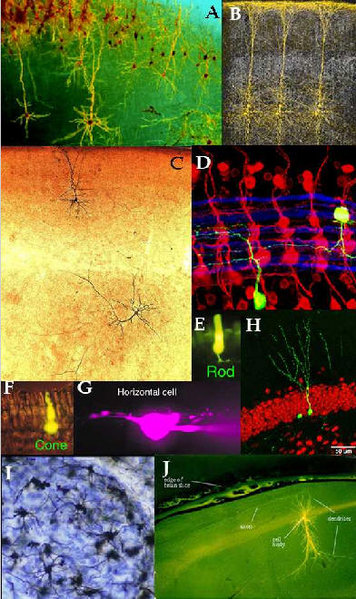

Thus far we haven't considered a single "type" *per se*, but generally when neuroscientists model neurons they model pyramidal cells (**PC**) which are commonly found in the cortex (layer 2/3 & layer 5) and hippocampus (CA1, CA3). 

Inhibition is normally modelled as Parvalbumin+ (PV; the neurons stain positive for the protein parvalbumin when exposed to the right antibodies) interneurons (**IN**).
[Many others exist, even just in the cortex](https://knowingneurons.com/2014/11/05/inhibitory-neurons-keeping-the-brains-traffic-in-check/): ![](https://knowingneurons.files.wordpress.com/2014/11/interneuron_650.jpg?resize=610%2C809)


Many parameters are chosen based on experimental recordings from non-human mammals. Keep in mind there are known differences between the human cortex and a rat cortex, for example.

Just remember:

> All models are wrong, but some are useful. - George E. Box

---